## Contents:
1. [Preparation](#first-bullet)  
2. [Initial metrics for comparison](#second-bullet)   
3. [Initial models](#third-bullet)    
     3.1. [Linear regression](#fourth-bullet)   
     3.2. [Refining linear model](#fifth-bullet)
4. [Additional models](#sixth-bullet)   
     4.1. [Random forest model](#seventh-bullet)   
     4.2. [Logistic regression](#eighth-bullet)   
     4.3. [Polynomial regression](#ninth-bullet)   
     4.4. [SVR](#tenth-bullet)      
5. [Final model selection](#eleventh-bullet)  
     5.1. [Store assessment data](#15)    
     5.2. [Compare each model](#16)   
     5.3. [Data quantity assessment](#17)   
     5.4. [Complete pipeleine](#18)   
6. [Predictive modeling scenarios](#twelfth-bullet)   
7. [Summary](#thirteenth-bullet)   
8. [Further work](#fourthteenth-bullet)

# 1. Preparations <a class="anchor" id="first-bullet"></a>

## 1.1. Import operating system and modules <a class="anchor" id="first-bullet-1"></a>

In [1]:
import os
from urllib.request import urlopen
from json import loads
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
from matplotlib.pyplot import figure
import matplotlib.colors as clrs
import datetime as dt
from matplotlib.dates import (DateFormatter, MinuteLocator, AutoDateLocator, AutoDateFormatter, datestr2num)
import seaborn as sns
import plotly.express as px
import altair as alt

## 1.2. Import skikit-learn models and metrics

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import validation_curve
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVC, SVR

## 1.3. Read in datasets

In [3]:
clean_total = pd.read_csv(r'cleaned_total.csv')
state_bans = pd.read_csv(r'banned-state-Copy1.csv')
url2 = r'https://docs.google.com/spreadsheets/d/1hTs_PB7KuTMBtNMESFEGuK-0abzhNxVv4tgpI5-iKe8/export?exportFormat=csv'
bans = pd.read_csv(url2, skiprows = 2)

train = pd.read_csv(r'train1.csv')
test = pd.read_csv(r'test1.csv')
total = pd.read_csv(r'total21.csv')
dums = pd.read_csv(r'dums1.csv')
X_train = pd.read_csv(r'X_train1.csv')
X_test = pd.read_csv(r'X_test1.csv')
y_train = pd.read_csv(r'y_train1.csv')
y_test = pd.read_csv(r'y_test1.csv')

## 1.4. Correct issues in these datasets

After completing the preprocessing and training, I realized that the dataframes I was using were unnecessarily large.  This slowed all the models and complicated each piece of analysis and did not seem necessary for analysis or modeling.  The dataframes greatly increased in size after I created dummy variables for the categorical columns.  I realized that while dummy variables could be helpful to analyze elements such as whether a district had banned books or not, I did not need to create dummy variables for each distinct district name.  I may not even find dummy variables useful for each state, but I will first eliminate the extra columns for districts.  I am going to create a new dataframe with dummy variables and therefore also will re-split the data before continuing on to modeling.  While I had previously worked to prepare the data, I found other small edits were necessary as I began modeling.  I will complete these before beginning modeling.

In [4]:
clean_total.head(30)

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean
0,NaN,NaN,NaN,Alabama,Albertville city,NaN,0.0,100005.0,2514,32.0,54.323556,0.0,2021,-22.323556
1,NaN,NaN,NaN,Alabama,Marshall county,NaN,0.0,100006.0,2988,36.0,54.323556,0.0,2021,-18.323556
2,NaN,NaN,NaN,Alabama,Hoover city,NaN,0.0,100007.0,7434,61.0,54.323556,0.0,2021,6.676444
3,NaN,NaN,NaN,Alabama,Madison city,NaN,0.0,100008.0,5232,70.0,54.323556,0.0,2021,15.676444
4,NaN,NaN,NaN,Alabama,Leeds city,NaN,0.0,100011.0,939,39.0,54.323556,0.0,2021,-15.323556
5,NaN,NaN,NaN,Alabama,Boaz city,NaN,0.0,100012.0,1245,39.0,54.323556,0.0,2021,-15.323556
6,NaN,NaN,NaN,Alabama,Trussville city,NaN,0.0,100013.0,2363,58.0,54.323556,0.0,2021,3.676444
7,NaN,NaN,NaN,Alabama,Alexander city,NaN,0.0,100030.0,1536,38.0,54.323556,0.0,2021,-16.323556
8,NaN,NaN,NaN,Alabama,Andalusia city,NaN,0.0,100060.0,887,42.0,54.323556,0.0,2021,-12.323556
9,NaN,NaN,NaN,Alabama,Anniston city,NaN,0.0,100090.0,995,21.0,54.323556,0.0,2021,-33.323556


In [5]:
clean_total[clean_total['District'].str.contains("Anchorage")]

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean
145,"Kobabe, Maia",Gender Queer: A Memoir,Banned in Libraries and Classrooms,Alaska,Anchorage school district,Administrator,41.0,200180.0,27500,39.0,54.323556,1.0,2021,-15.323556
4120,NaN,NaN,NaN,Kentucky,Anchorage independent,NaN,0.0,2100090.0,251,87.0,54.323556,0.0,2021,32.676444


In [6]:
state_bans['District'] = state_bans['District'].replace(['North East'], 'North east independent school district', regex=True)

In [7]:
state_bans.State.unique()

array(['Texas', 'Pennsylvania', 'Florida', 'Oklahoma', 'Kansas',
       'Indiana', 'Tennessee', 'Virginia', 'Missouri', 'Georgia',
       'New York', 'Utah', 'North Carolina', 'Washington', 'Wisconsin',
       'Ohio', 'Iowa', 'Illinois', 'New Jersey', 'Michigan', 'Alaska',
       'South Carolina', 'Maryland', 'Minnesota', 'Arkansas',
       'Rhode Island'], dtype=object)

In [8]:
state_bans[state_bans['State'].str.contains("Ala")]

,Unnamed: 0,State,District,Date of Challenge/Removal,State_Frequency,District_Frequency
1580,0,Alaska,Anchorage School District,2021-10-01 00:00:00,1,1


In [9]:
print(state_bans.loc[state_bans['State'] == 'Texas', 'District'].unique())

['North east independent school district'
 'Granbury Independent School District' 'Fredericksburg ISD' 'Prosper ISD'
 'Klein ISD' 'Birdville' 'Katy' 'Leander' 'Keller'
 'Lamar Consolidated ISD' 'Spring Branch ISD' 'Tyler ISD'
 'Canutillo Independent School District' 'Denton' 'Lake Travis' 'Waller']


In [10]:
z = bans['State'].value_counts()

z1 = z.to_dict()

bans['Number_state_bans'] = bans['State'].map(z1) 

In [11]:
z = bans['District'].value_counts()

z1 = z.to_dict()

bans['District_bans'] = bans['District'].map(z1) 

In [12]:
bans

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge,Number_state_bans,District_bans
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,Florida,Indian River County School District,November 2021,Administrator,566,161
1,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Central York School District,August 2021,Administrator,458,441
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,November 2021,Administrator,566,161
3,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,New York,Marlboro Central School District,February 2022,Administrator,13,2
4,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,Texas,Fredericksburg Independent School District,March 2022,Administrator,801,42
...,...,...,...,...,...,...,...,...,...,...,...,...
2527,"Zia, Farhana",The Garden of My Imaan,Banned Pending Investigation,NaN,NaN,NaN,Florida,Duval County Public Schools,January 2022,Administrator,566,176
2528,"Ziemke, Kristin",Read the World: Rethinking Literacy for Empath...,Banned in Classrooms,"Muhtaris, Katie",NaN,NaN,Pennsylvania,Central York School District,August 2021,Administrator,458,441
2529,"Zoboi, Ibi",American Street,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Pennridge School District,August 2021,Administrator,458,3
2530,"Zoboi, Ibi",Black Enough: Stories of Being Young & Black i...,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,November 2021,Administrator,566,161


In [13]:
clean_total.head()

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean
0,NaN,NaN,NaN,Alabama,Albertville city,NaN,0.0,100005.0,2514,32.0,54.323556,0.0,2021,-22.323556
1,NaN,NaN,NaN,Alabama,Marshall county,NaN,0.0,100006.0,2988,36.0,54.323556,0.0,2021,-18.323556
2,NaN,NaN,NaN,Alabama,Hoover city,NaN,0.0,100007.0,7434,61.0,54.323556,0.0,2021,6.676444
3,NaN,NaN,NaN,Alabama,Madison city,NaN,0.0,100008.0,5232,70.0,54.323556,0.0,2021,15.676444
4,NaN,NaN,NaN,Alabama,Leeds city,NaN,0.0,100011.0,939,39.0,54.323556,0.0,2021,-15.323556


In [14]:
clean_total['Frequency'] = clean_total['Frequency'].fillna(0)
clean_total['District_bans'] = clean_total['District_bans'].fillna(0)

Determining whether any of these columns contain non numeral or invalid values may suggest whether we should impute missing values using the mean or median (or another method).

In [15]:
df1 = clean_total[clean_total[['Frequency', 'ID', 'Students_tested', 'Reading_proficiency_rate', 'Average_proficiency', 'District_bans', 'Year', 'Diff_from_mean']].isna().any(axis=1)]
df1

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean


With no missing values in these numeric columns, we do not need to choose the best way to fill in missing data. 

In [16]:
clean_total['District_no_bans'] = clean_total['District_bans'] == 0

In [17]:
clean_total['District_has_bans'] = clean_total['District_no_bans'] == False

In [18]:
clean_total.District_has_bans.unique()

array([False,  True])

In [19]:
clean_total.District_no_bans.unique()

array([ True, False])

In [20]:
clean_total.District_has_bans.value_counts()

False    11113
True      2531
Name: District_has_bans, dtype: int64

In [21]:
clean_total.District_no_bans.value_counts()

True     11113
False     2531
Name: District_no_bans, dtype: int64

In [22]:
selection = clean_total[['Students_tested', 'Reading_proficiency_rate', 'District_bans', 'Diff_from_mean', 'State', 'District', 'Year', 'Origin of Challenge', 'Type of Ban', 'District_has_bans']]

In [23]:
dums = pd.get_dummies(selection, drop_first = True , columns=['State', 'Origin of Challenge', 'Type of Ban', 'District_has_bans'])

In [24]:
dums.head()

,Students_tested,Reading_proficiency_rate,District_bans,Diff_from_mean,District,Year,State_Alaska,State_Arizona,State_Arkansas,State_California,...,State_Washington,State_West virginia,State_Wisconsin,State_Wyoming,Origin of Challenge_Formal Challenge,Origin of Challenge_Other,Type of Ban_Banned in Classrooms,Type of Ban_Banned in Libraries,Type of Ban_Banned in Libraries and Classrooms,District_has_bans_True
0,2514,32.0,0.0,-22.323556,Albertville city,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2988,36.0,0.0,-18.323556,Marshall county,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7434,61.0,0.0,6.676444,Hoover city,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5232,70.0,0.0,15.676444,Madison city,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,939,39.0,0.0,-15.323556,Leeds city,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dums.shape

(13644, 63)

While this is still a large amount of data, this is much more manageable than the previous attempt with dummy variables for each district.  Now we have only 63 columns rather than the ten thousand or more on my previous run through.  We will now split the data and move forward with modeling.

Before dropping district ID numbers, I want to verify that we have correctly merged the dataframes to ensure that districts with book bans also contain their reading proficiency rate.  If either piece of data were missing, we would need to examine ID numbers, likely along with state and district names to correctly pair the data for each district.  The following confirms that our data appears to be merged correctly.  Therefore, we can drop ID numbers.

In [26]:
ban_df = dums.loc[dums['District_has_bans_True'] == 1]
ban_df

,Students_tested,Reading_proficiency_rate,District_bans,Diff_from_mean,District,Year,State_Alaska,State_Arizona,State_Arkansas,State_California,...,State_Washington,State_West virginia,State_Wisconsin,State_Wyoming,Origin of Challenge_Formal Challenge,Origin of Challenge_Other,Type of Ban_Banned in Classrooms,Type of Ban_Banned in Libraries,Type of Ban_Banned in Libraries and Classrooms,District_has_bans_True
145,27500,39.0,1.0,-15.323556,Anchorage school district,2021,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
657,2456,38.0,1.0,-16.323556,Siloam springs school district,2022,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
1719,41440,61.0,42.0,6.676444,Brevard public schools,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1720,41440,61.0,42.0,6.676444,Brevard public schools,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1721,41440,61.0,42.0,6.676444,Brevard public schools,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,6341,52.0,21.0,-2.323556,School district of waukesha,2021,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
13572,6341,52.0,21.0,-2.323556,School district of waukesha,2021,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
13573,6341,52.0,21.0,-2.323556,School district of waukesha,2021,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
13574,6341,52.0,21.0,-2.323556,School district of waukesha,2021,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


As I no longer am using dummy variables for each district, I am working with categorical as well as numeric columns.  This will not work when scaling data and similar.  As we have created columns for both the number of bans in each district and dummy variables representing whether each district has banned books, we don't really need the names of each district.  We have enough information in numeric data alone to compare and analyze each other variable and any relationship it may have with book bans.  Therefore, I will move ahead with only numeric data.

In [27]:
dums_numeric = dums._get_numeric_data()
dums_numeric

,Students_tested,Reading_proficiency_rate,District_bans,Diff_from_mean,Year,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,State_Washington,State_West virginia,State_Wisconsin,State_Wyoming,Origin of Challenge_Formal Challenge,Origin of Challenge_Other,Type of Ban_Banned in Classrooms,Type of Ban_Banned in Libraries,Type of Ban_Banned in Libraries and Classrooms,District_has_bans_True
0,2514,32.0,0.0,-22.323556,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2988,36.0,0.0,-18.323556,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7434,61.0,0.0,6.676444,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5232,70.0,0.0,15.676444,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,939,39.0,0.0,-15.323556,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,522,61.0,0.0,6.676444,2021,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13640,1697,70.0,0.0,15.676444,2021,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13641,1393,52.0,0.0,-2.323556,2021,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13642,1396,63.0,0.0,8.676444,2021,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 1.5 Prepare the corrected data for modeling

In [117]:
X = dums_numeric.drop('District_bans', axis=1).values
y = dums_numeric['District_bans'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 2. Initial metrics for comparison  <a class="anchor" id="second-bullet"></a>

## 2.1. Using mean

Before we examine true models, I'll look at how the mean performs.  This will give us metrics against which to compare the performance of later models.

Not even a model--mean books banned per district?
Mean reading proficiency per state?
The means can be used to compare later models to see if the new models are more effective at predicting reading proficiency than simply the mean of book bans

### 2.1.1. Find the mean for the training set

In [119]:
train_mean = y_train.mean()
train_mean

42.22702702702703

In [120]:
type(y_train)

numpy.ndarray

In [121]:
y_train.shape

(10915,)

In [122]:
X_train.shape

(10915, 61)

### 2.1.2. Examining performance

#### 2.1.1.1. Create dummy regressor to fit and evaluate mean as a model

In [266]:
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
y_tr_pred = dumb_reg.constant_

In [269]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_test, y_test)
y_te_pred = dumb_reg.constant_

#### 2.1.1.2. R-squared as metric

In [125]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [126]:
r_squared(y_train, y_tr_pred)

0.0

As expected, the r-squared for the training set is zero.  This indicates that there is no residuals between the points used to create the model and the model itself.  This should be zero.

Now we'll examine how this performs against the test set.  If the mean is a reasonably good model, this r-squared should be not far from but not exactly zero.

In [127]:
r_squared(y_test, y_tr_pred)

-0.000681641213987616

This is the r-squared metric against which we will compare future models.

#### 2.1.1.2. Mean absolute error as metric

In [128]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [129]:
mae(y_train, y_tr_pred)

71.49195528097957

In [130]:
mae(y_test, y_te_pred)

76.41860418900934

#### 2.1.1.2. Mean square error as metric

In [131]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [132]:
mse(y_train, y_tr_pred)

13708.292755568207

In [133]:
mse(y_test, y_te_pred)

15024.778970924373

In [267]:
mean_cv_results = cross_validate(dumb_reg, X_train, y_train, cv=5)
mean_cv_results

{'fit_time': array([0.00400162, 0.00700164, 0.00299788, 0.00499582, 0.00399733]),
 'score_time': array([0.        , 0.        , 0.00099921, 0.0010016 , 0.        ]),
 'test_score': array([-2.88321818e-04, -9.41636651e-05, -6.53521606e-05, -9.39707800e-05,
        -6.97524006e-04])}

In [268]:
mean_cv_avg = np.mean(mean_cv_results['test_score'])
mean_cv_avg

-0.0002478664858488244

In [270]:
mean_cv_results_te = cross_validate(dumb_reg, X_test, y_test, cv=5)
mean_cv_results_te

{'fit_time': array([0.00100064, 0.00101733, 0.00099993, 0.00099945, 0.00100017]),
 'score_time': array([0.00100088, 0.00097871, 0.00100279, 0.        , 0.        ]),
 'test_score': array([-0.00766815, -0.00084344, -0.00387639, -0.00083367, -0.00026341])}

In [271]:
mean_cv_avg_te = np.mean(mean_cv_results_te['test_score'])
mean_cv_avg_te

-0.0026970133375272985

We will use all of the previous metrics to evaluate future models and see whether they perform as well, better, or less well than the mean of the data.  Ideally, we will find at least model that is a better fit for the data to use for future modeling.

# 3. Initial Models  <a class="anchor" id="third-bullet"></a>

## 3.1. Linear regression  <a class="anchor" id="fourth-bullet"></a>

### 3.1.1. Scale the data

In [134]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

### 3.1.2. Fit the model

In [135]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

### 3.1.3. Use this model to make predictions

Make predictions using the model on both train and test splits

In [136]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

### 3.1.4. Assess model performance

In [137]:
lr_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
lr_r2

(0.8101241730675048, 0.7967036023482487)

In [138]:
lr_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
lr_mae

(25.485210681715476, 27.279477756821315)

In [139]:
lr_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
lr_mse

(2602.873422796246, 3054.483440302713)

In [272]:
lr_cv_results_tr = cross_validate(lm, X_tr_scaled, y_train, cv=5)

In [274]:
lr_cv_avg = np.mean(lr_cv_results_tr['test_score'])
lr_cv_avg

-3.265739568926812e+23

In [275]:
lr_cv_results_te = cross_validate(lm, X_te_scaled, y_test, cv=5)

In [277]:
lr_cv_avg_te = np.mean(lr_cv_results_te['test_score'])
lr_cv_avg_te

0.7875749398024844

## 3.2. Refine linear model  <a class="anchor" id="fifth-bullet"></a>

### 3.2.1. Define the pipeline

In [141]:
pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

### 3.2.2. Fit the pipeline

In [142]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000001F9BCB665E0>)),
                ('linearregression', LinearRegression())])

### 3.2.3. Access model performance on train and test sets

In [143]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [144]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7690860001866129, 0.753778739619065)

In [145]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(27.380068288642022, 29.108797244996264)

In [146]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(3165.436710801132, 3699.420015165966)

In [278]:
pipe_lr_cv_tr = cross_validate(pipe, X_train, y_train, cv=5)

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [279]:
pipe_lr_avg_cv_tr = np.mean(pipe_lr_cv_tr['test_score'])
pipe_lr_avg_cv_tr

0.7670301620822372

In [280]:
pipe_lr_cv_te = cross_validate(pipe, X_test, y_test, cv=5)

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [281]:
pipe_lr_avg_cv_te = np.mean(pipe_lr_cv_te['test_score'])
pipe_lr_avg_cv_te

0.7490550941373499

Selecting a subset of features has an impact on performance. SelectKBest defaults to k=10. We've just seen that 10 is worse than using all features. What is the best k? We could create a new pipeline with a different value of k:

### 3.2.4. Define a new pipeline with k best features

In [147]:
pipe15 = make_pipeline( 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

### 3.2.5. Fit new pipeline

In [148]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x000001F9BCB665E0>)),
                ('linearregression', LinearRegression())])

### 3.2.6. Access performance

In [149]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [150]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7768236361203744, 0.7606094281800322)

In [151]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(25.659028715574117, 27.37798711193005)

In [152]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(3059.3669321851253, 3596.7904293182123)

In [282]:
k_cv_tr = cross_validate(pipe15, X_train, y_train, cv=5)

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [283]:
avg_cv_k_tr = np.mean(k_cv_tr['test_score'])
avg_cv_k_tr

0.7743629940262677

In [286]:
k_cv_te = cross_validate(pipe15, X_test, y_test, cv=5)

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [287]:
avg_cv_k_te = np.mean(k_cv_te['test_score'])
avg_cv_k_te

0.7526105647498482

## Visualize k best features?

In [198]:
k = [k+1 for k in range(61)]
grid_params = {'selectkbest__k': k}

In [199]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [200]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001F9BCB665E0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [201]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [202]:
lr_grid_cv.best_params_

{'selectkbest__k': 58}

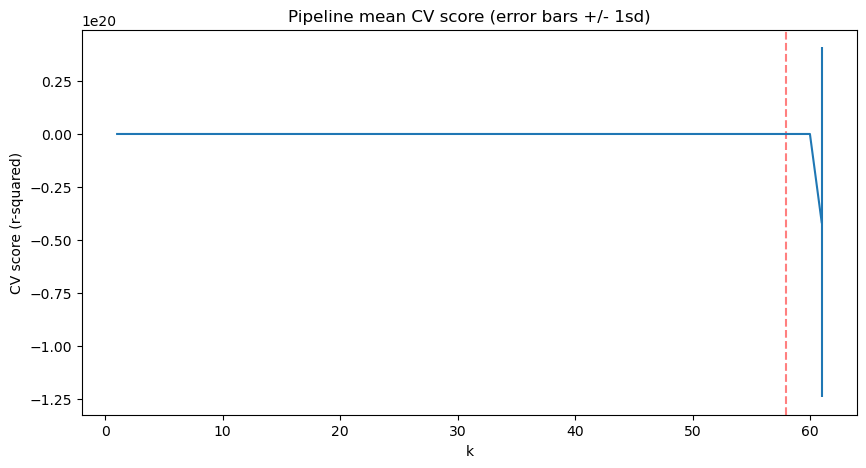

In [203]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

This is not a very useful result.  This basically indicates that all features are needed.  However, logically, considering the dataframe at this point, this makes sense.  Many of the features are dummy variables allowing us to examine categorical features in numeric ways, such as for each State.  There are only a handful of features that are truly numeric variables that would have enough possible variation and information to affect the overall model.  Therefore, this examination of the best number of features to use verifies the premise I had already been using, that is that we have eliminated the information we do not need to build possibly useful models and that everything left is important for making any conclusions.

# 4. Additional models  <a class="anchor" id="sixth-bullet"></a>

## 4.1. Random forest model  <a class="anchor" id="seventh-bullet"></a>

### 4.1.1. Make pipeline

In [153]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### 4.1.2. Fit and access performance

In [154]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [155]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.99771406, 0.99981121, 0.99963972, 0.99961689, 0.99997786])

In [156]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.999351946453163, 0.0008292627410377901)

In [288]:
rf_default_cv_results_te = cross_validate(RF_pipe, X_test, y_test, cv=5)

In [289]:
rf_cv_scores_te = np.mean(rf_default_cv_results_te['test_score'])
rf_cv_scores_te

0.9978914914454846

In [245]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=47))])

In [246]:
y_tr_pred = RF_pipe.predict(X_train)
y_te_pred = RF_pipe.predict(X_test)

In [247]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9999368121568096, 0.9998809154931012)

In [248]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.040558863948694464, 0.07745694393550752)

In [249]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.8661974530462665, 1.7892183950164893)

Cross-validation score(s) of 1.0 indicate over-fitting

### 4.1.3. Hyperparameter search using gridsearch

In [157]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [158]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [159]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'standardscaler': [StandardScaler(), None]})

In [160]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 615,
 'standardscaler': StandardScaler()}

In [161]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.99830236, 0.99983134, 0.99965616, 0.99954185, 0.99997519])

In [162]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9994613808241418, 0.0005980979959658906)

In [163]:
X_index = list(set(dums_numeric.columns) - {'District_has_bans_True'})


In [164]:
feature_importances = pd.DataFrame(rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_, index = X_index, columns=['District_has_bans_True']).sort_values('District_has_bans_True',ascending=False)

In [165]:
feature_importances.head()

,District_has_bans_True
State_Maryland,0.578690
State_Colorado,0.119537
State_Georgia,0.118332
State_Puerto rico,0.079894
State_New hampshire,0.039125


## 4.2. Logistic regression  <a class="anchor" id="eighth-bullet"></a>

In [554]:
from sklearn import metrics

In [555]:
log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver = 'newton-cg'))

In [556]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])

In [557]:
y_pred=log_reg.predict(X_test)

In [558]:
metrics.confusion_matrix(y_test, y_pred)

array([[2200,    0,    0, ...,    0,    1,    0],
       [   0,    6,    3, ...,    1,    0,    1],
       [   0,    0,    2, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,   59,    0,    0],
       [   0,    0,    0, ...,    0,   95,    0],
       [   0,    0,    0, ...,    0,    0,  103]], dtype=int64)

In [559]:
y_pred_tr=log_reg.predict(X_train)

In [561]:
r2_score(y_train, y_pred_tr), r2_score(y_test, y_pred)

(0.9627928339593116, 0.9478935027663811)

In [564]:
mean_absolute_error(y_train, y_pred_tr), mean_absolute_error(y_test, y_pred)

(1.6961978928080623, 2.4019787467936973)

In [566]:
mean_squared_error(y_train, y_pred_tr), mean_squared_error(y_test, y_pred)

(510.0467246907925, 782.8886038842066)

It seems very strange to me that the average error metrics are significantly higher for the training set than the test set.  Why?

In [568]:
lg_best_cv_results_tr = cross_validate(log_reg, X_train, y_train, cv=5)
avg_cv_lg_tr = np.mean(lg_best_cv_results_tr['test_score'])
avg_cv_lg_tr

0.9799358680714614

In [570]:
lg_best_cv_results_te = cross_validate(log_reg, X_test, y_test, cv=5)
avg_cv_lg_tr = np.mean(lg_best_cv_results_te['test_score'])
avg_cv_lg_tr

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.9736162919649158

## Alter approach

The current random forest model was overfitted.  Multiple linear regression performed reasonably well, but none of the models thus far seem a great fit for the data and research question.

Re-reading my original intentions for this research and considering the dataframe(s) at this point, I decided to focus on the comparison between two groups:  districts that have banned books and districts without book bans.  The difference between a district with no book bans and one with book bans seems more interesting to me than between a district with a few book bans and one with a few more, as far as overall trends are concerned.

In making this change, it makes more sense to use classification rather than regression models.

### Divide groups

In [571]:
clean_total.head()

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean,District_no_bans,District_has_bans
0,NaN,NaN,NaN,Alabama,Albertville city,NaN,0.0,100005.0,2514,32.0,54.323556,0.0,2021,-22.323556,True,False
1,NaN,NaN,NaN,Alabama,Marshall county,NaN,0.0,100006.0,2988,36.0,54.323556,0.0,2021,-18.323556,True,False
2,NaN,NaN,NaN,Alabama,Hoover city,NaN,0.0,100007.0,7434,61.0,54.323556,0.0,2021,6.676444,True,False
3,NaN,NaN,NaN,Alabama,Madison city,NaN,0.0,100008.0,5232,70.0,54.323556,0.0,2021,15.676444,True,False
4,NaN,NaN,NaN,Alabama,Leeds city,NaN,0.0,100011.0,939,39.0,54.323556,0.0,2021,-15.323556,True,False


In [572]:
selection = clean_total[['Students_tested', 'Reading_proficiency_rate', 'District_bans', 'Diff_from_mean', 'State', 'District', 'Origin of Challenge', 'Type of Ban', 'District_has_bans']]

In [573]:
total_num = selection._get_numeric_data()
total_num

,Students_tested,Reading_proficiency_rate,District_bans,Diff_from_mean,District_has_bans
0,2514,32.0,0.0,-22.323556,False
1,2988,36.0,0.0,-18.323556,False
2,7434,61.0,0.0,6.676444,False
3,5232,70.0,0.0,15.676444,False
4,939,39.0,0.0,-15.323556,False
...,...,...,...,...,...
13639,522,61.0,0.0,6.676444,False
13640,1697,70.0,0.0,15.676444,False
13641,1393,52.0,0.0,-2.323556,False
13642,1396,63.0,0.0,8.676444,False


In [574]:
without_bans = total_num[(total_num['District_has_bans'] == False)]
with_bans = total_num[(total_num['District_has_bans'] == True)]

Mapping true/false to 1/0:

In [575]:
total_num["District_has_bans"] = total_num["District_has_bans"].astype(int)

In [576]:
total_num.head()

,Students_tested,Reading_proficiency_rate,District_bans,Diff_from_mean,District_has_bans
0,2514,32.0,0.0,-22.323556,0
1,2988,36.0,0.0,-18.323556,0
2,7434,61.0,0.0,6.676444,0
3,5232,70.0,0.0,15.676444,0
4,939,39.0,0.0,-15.323556,0


In [577]:
X2 = total_num.drop('District_has_bans', axis=1).values
y2 = total_num['District_has_bans'].values

In [578]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

## 4.3. Random forest classifier

In [579]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [580]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(dual=False, penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train2, y_train2)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False,
                                                     penalty='l1'))),
                ('classification', RandomForestClassifier())])

In [581]:
y_pred2=clf.predict(X_test2)

In [582]:
rfc_cnf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
rfc_cnf_matrix

array([[2201,    0],
       [   0,  528]], dtype=int64)

In [583]:
y_pred2_tr=clf.predict(X_train2)

In [584]:
rfc_cnf_matrix_tr = metrics.confusion_matrix(y_train2, y_pred2_tr)
rfc_cnf_matrix_tr

array([[8912,    0],
       [   0, 2003]], dtype=int64)

In [585]:
rfc_best_cv_results_te = cross_validate(clf, X_test2, y_test2, cv=5)
avg_cv_rfc_te = np.mean(rfc_best_cv_results_te['test_score'])
avg_cv_rfc_te

1.0

In [586]:
rfc_best_cv_results_tr = cross_validate(clf, X_train2, y_train2, cv=5)
avg_cv_rfc_tr = np.mean(rfc_best_cv_results_tr['test_score'])
avg_cv_rfc_tr

1.0

I am starting to become concerned about the performance of these models.  Logistic regression and random forest classifier both resulted in models without a single error, according to the confusion matrix for each.  These models seem to be more perfect than I would expect.  I believe that this may indicate overfitting.  Adjusting hyperparameters may be able to remedy this.

## 4.3. Support vector classification (SVC)  <a class="anchor" id="tenth-bullet"></a>

In [587]:
new_pipe = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter = 10000, dual = True)
)

In [588]:
new_pipe.fit(X_train2, y_train2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(max_iter=10000))])

In [589]:
y_pred3=new_pipe.predict(X_test2)

In [590]:
svc_cnf_matrix = metrics.confusion_matrix(y_test2, y_pred3)
svc_cnf_matrix

array([[2200,    1],
       [  41,  487]], dtype=int64)

In [591]:
y_pred3_tr=new_pipe.predict(X_train2)

In [592]:
svc_cnf_matrix_tr = metrics.confusion_matrix(y_train2, y_pred3_tr)
svc_cnf_matrix_tr

array([[8907,    5],
       [ 129, 1874]], dtype=int64)

In [593]:
svc_best_cv_results_tr = cross_validate(new_pipe, X_train2, y_train2, cv=5)
avg_cv_svc_tr = np.mean(svc_best_cv_results_tr['test_score'])
avg_cv_svc_tr

0.9873568483737974

In [594]:
svc_best_cv_results_te = cross_validate(new_pipe, X_test2, y_test2, cv=5)
avg_cv_svc_te = np.mean(svc_best_cv_results_te['test_score'])
avg_cv_svc_te

0.9765493833383742

# 6. Final model selection  <a class="anchor" id="eleventh-bullet"></a>

## 6.1. Access performance  <a class="anchor" id="15"></a>

### 6.1.1. Create a dataframe to store performance information from our regression models

Use the accessments we have used so far to begin this dataframe.  We will add additional performance information to this as we evaluate each model further.

In [595]:
data = {'Model': ['mean_train', 'mean_test', 'lr_tr', 'lr_te', 'ppln_lr_tr', 'ppln_lr_te', 'ppln_kbest_tr', 'ppln_kbest_te', 'rnd_for_reg_tr', 'rnd_for_reg_te', 'log_reg_tr', 'log_reg_te'],
        'r2': [0.0, -0.0006368, 0.8859232, 0.8781678, 0.8718419, 0.86247707, 0.8821577, 0.87607100, 0.9999368121568096, 0.9998809154931012, 0.09114604427649275, 0.9998809154931012],
       'MAE': [0.2996668, 0.31208787, 0.058183501, 0.06111526, 0.061202141, 0.064859433, 0.05630417, 0.05888752, 0.040558863948694464, 0.07745694393550752, 34.096197892808064, 0.07745694393550752],
       'MSE': [0.1498334, 0.15604393, 0.01709251, 0.019011167, 0.019202351, 0.021459618, 0.017656712, 0.01933836, 0.8661974530462665, 1.7892183950164893, 12458.836097114063, 1.7892183950164893],
        'avg_cv': [round(-0.0002478664858488244, 6), round(-0.0026970133375272985, 6), round(-3.265739568926812e+23, 6), round(0.7875749398024844, 6), round(0.7670301620822372, 6), round(0.7490550941373499, 6), round(0.7743629940262677, 6), round(0.7526105647498482, 6), round(0.999351946453163, 6), round(0.9978914914454846, 0), round(0.8561612459917545, 6), round(0.8391336492253924, 6)]}
  
# Create DataFrame
df_perform = pd.DataFrame(data)
  
# Print the output.
df_perform.round(6)

,Model,r2,MAE,MSE,avg_cv
0,mean_train,0.000000,0.299667,0.149833,-2.480000e-04
1,mean_test,-0.000637,0.312088,0.156044,-2.697000e-03
2,lr_tr,0.885923,0.058184,0.017093,-3.265740e+23
3,lr_te,0.878168,0.061115,0.019011,7.875750e-01
4,ppln_lr_tr,0.871842,0.061202,0.019202,7.670300e-01
5,ppln_lr_te,0.862477,0.064859,0.021460,7.490550e-01
6,ppln_kbest_tr,0.882158,0.056304,0.017657,7.743630e-01
7,ppln_kbest_te,0.876071,0.058888,0.019338,7.526110e-01
8,rnd_for_reg_tr,0.999937,0.040559,0.866197,9.993520e-01
9,rnd_for_reg_te,0.999881,0.077457,1.789218,1.000000e+00


### 6.1.2. Create a dataframe to store performance information from our classification models

In [596]:
data2 = {'model': ['rnd_for_class_tr', 'rnd_for_class_te', 'svc_tr', 'svc_te'],
        'accuracy': [1.0, 1.0, 0.8859232, 0.9846097471601319],
        'precision': [1.0, 1.0, 0.9994389587073609, 0.9995456610631531],
        'recall': [1.0, 1.0, 0.9857237715803453, 0.9817045961624274],
        'f1': [1.0, 1.0, 0.9877233165368758, 0.9905447996],
        'cv': [1.0, 1.0, 0.9874484654145672, 0.9765493833383742]}
  
# Create DataFrame
df_perform_class = pd.DataFrame(data2)
  
# Print the output.
df_perform_class.round(6)

,model,accuracy,precision,recall,f1,cv
0,rnd_for_class_tr,1.000000,1.000000,1.000000,1.000000,1.000000
1,rnd_for_class_te,1.000000,1.000000,1.000000,1.000000,1.000000
2,svc_tr,0.885923,0.999439,0.985724,0.987723,0.987448
3,svc_te,0.984610,0.999546,0.981705,0.990545,0.976549


#### 6.1.2.1. Gather additional metrics     

The following function was found on stack overflow posted by rnso in January 2018.    
https://stackoverflow.com/questions/48100173/how-to-get-precision-recall-and-f-measure-from-confusion-matrix-in-python

In [597]:
def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn)

In [598]:
print("precision and recall:", myscores(rfc_cnf_matrix))

precision and recall: (1.0, 1.0)


In [599]:
print("precision and recall:", myscores(rfc_cnf_matrix_tr))

precision and recall: (1.0, 1.0)


In [600]:
print("precision and recall:", myscores(svc_cnf_matrix))

precision and recall: (0.9995456610631531, 0.9817045961624274)


In [601]:
print("precision and recall:", myscores(svc_cnf_matrix_tr))

precision and recall: (0.9994389587073609, 0.9857237715803453)


In [602]:
print(metrics.accuracy_score(y_test2, y_pred2))

1.0


In [603]:
print(metrics.accuracy_score(y_train2, y_pred2_tr))

1.0


In [604]:
print(metrics.accuracy_score(y_test2, y_pred3))

0.9846097471601319


In [605]:
print(metrics.accuracy_score(y_train2, y_pred3_tr))

0.9877233165368758


In [606]:
# f1 = 2*((precision*recall)/(precision+recall))

In [607]:
# rfc_f1 = 2((1)/(2)) = 1
# svc_f1 = 2((0.9995456610631531*0.9817045961624274)/(0.9995456610631531+0.9817045961624274)) = 2*(0.4952723998) = 0.9905447996

## Interpreting these results

Metrics like accuracy, precision, recall are good ways to evaluate classification models for balanced datasets, but if the data is imbalanced then other methods like ROC/AUC perform better in evaluating the model performance.

These results verify that whether we use a pipeline or not, the linear regression models are the same.  Additionally, we can easily compare each model's performance.  The closer the r-squared value is to 1, or 100%, the better the performance of the model.  Minimizing the mean error is also important and indicative of a well-performing model.  The linear regression model, through a pipeline or not, results in an r-squared value of 0.919398.  This means that about 91.9% of the variance of book bans can be explained by the features of the model.  The mean absolute error is about 18 and mean squared error is about 2555.  There is not a standard scale for what indicates "good" MAE or MSE.  Instead, we use them in comparison with other models on this data.  In this case, the MAE and MSE are both lower with linear regression models than either the mean or kbest models.  Therefore, we can conclude that, comparing our current models, linear regression performs the best.

Considering the intention of this research, I believe that a classification model makes the most sense as it would examine various features with  whether a district has book bans or not.  The number of book bans per district for those districts with bans distracts from our overall goals.  Looking at the models we have developed, I will choose to use the support vector classifier model for predictive modeling.

## 6.2. Hyperparameter search using GridSearchCV

Recall performance information for the SCV model before tuning hyperparameters:

In [608]:
from sklearn.metrics import classification_report

new_pipe.fit(X_train2, y_train2)
predictions = new_pipe.predict(X_test2)
print(classification_report(y_test2, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2201
           1       1.00      0.92      0.96       528

    accuracy                           0.98      2729
   macro avg       0.99      0.96      0.97      2729
weighted avg       0.98      0.98      0.98      2729



In [609]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train2, y_train2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.972 total time=  14.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time=  13.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=  13.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time=  13.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=  11.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.972 total time=   8.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   8.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   8.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   9.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.965 total time=   8.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.972 total time=   5.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [610]:
print(grid.best_params_)
  
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [611]:
grid_predictions = grid.predict(X_test2)
  
# print classification report
print(classification_report(y_test2, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2201
           1       1.00      0.97      0.99       528

    accuracy                           0.99      2729
   macro avg       1.00      0.99      0.99      2729
weighted avg       0.99      0.99      0.99      2729



Hyperparameter tuning, in this case specifically using a C of 1 and gamma of 1, does clearly improve the performance of our model.

## 6.3. Create complete pipeline for final model  <a class="anchor" id="18"></a>

In [612]:
model = make_pipeline(
    StandardScaler(),
    LinearSVC(dual=False, C=1, verbose = 3)
)

## 6.4. Fit model on all available data before making predictions

In [613]:
total_num = total_num.drop(['Diff_from_mean', 'District_bans'], axis = 1)

I realized that the above columns should have been dropped before creating and training the models.  I will drop them not before I re-fit the model, but as the column 'difference from mean' is not independent from the column for reading proficiency and the column 'district bans' is not independent from 'district has bans' this may cause problems.  Colinearity is usually something to be avoided when building models (or doing most any statistical analysis).  It may be less of a concern in classification than in regression, but this is still a concern.  Ideally, I would go back to before I split data and began training models and remedy this possible problem.  At this point, I believe that it makes more sense for me to move forward just keeping this in mind for future work, but I will remedy it if necessary.

In [614]:
total_X = total_num.drop('District_has_bans', axis=1).values
total_y = total_num['District_has_bans'].values

In [615]:
model.fit(total_X, total_y)

[LibLinear]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False, verbose=3))])

In [616]:
cv_results = cross_validate(model, total_X, total_y, cv=5)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [617]:
cv = list(cv_results.values())

In [618]:
score=np.mean(cv)
score

0.2941416266306651

# 7. Use best model to make predictions  <a class="anchor" id="twelfth-bullet"></a>

## 7.1. Modeling scenario 1

#### Is a school district with higher than average reading proficiency more likely to have book bans than a district with lower reading proficiency?

As defined in earlier examination of the data, the average reading profiency rate for districts in this dataset was 54.323556.  Let's explore whether a district with higher and lower than that average rate may be more or less likely to have banned books.  Setting a reading proficiency score of 65 and 45 give values approximately equally higher and lower than average.

In order to examine only one factor (in this case, reading proficiency), we must hold all other variables equal.  Therefore, I will use the average value for each other column.  Students_tested	Reading_proficiency_rate	District_bans	Diff_from_mean	District_has_bans

In [619]:
total_num.mean()

Students_tested             5610.743770
Reading_proficiency_rate      56.871812
District_has_bans              0.185503
dtype: float64

In [620]:
Xnew = [[5610.743770, 65]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 65], Predicted=0


In [621]:
Xnew = [[5610.743770, 45]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 45], Predicted=0


In [622]:
Xnew = [[5610.743770, 75]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 75], Predicted=0


In [623]:
Xnew = [[5610.743770, 35]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 35], Predicted=0


In [624]:
Xnew = [[5610.743770, 85]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 85], Predicted=0


In [625]:
Xnew = [[5610.743770, 25]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 25], Predicted=0


In [626]:
Xnew = [[5610.743770, 95]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 95], Predicted=0


In [627]:
Xnew = [[5610.743770, 15]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 15], Predicted=0


In [628]:
Xnew = [[5610.743770, 99]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 99], Predicted=0


In [629]:
Xnew = [[5610.743770, 5]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5610.74377, 5], Predicted=0


Hmmm.  As all of the values for reading proficiency I have tried have resulted in a predicted 0 (that the district has no banned books), I am curious what values of X would result in a predicted 1.

In [630]:
from sklearn.datasets import make_blobs
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-0.79415228  2.10495117], Predicted=0
X=[-8.25290074 -4.71455545], Predicted=0
X=[-2.18773166  3.33352125], Predicted=0


As the majority of these values of X are negative, this is not very useful.  Logically, we know that there are not districts with a negative number of students or negative reading proficiency.

In [631]:
df_edit = total_num[(total_num['District_has_bans']==1)]

In [632]:
df_edit.mean()

Students_tested             21046.559068
Reading_proficiency_rate       68.599368
District_has_bans               1.000000
dtype: float64

In [633]:
Xnew = [[21046.559068, 68.599368]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[21046.559068, 68.599368], Predicted=0


Hmmm.  I'm wondering if either there is a problem with my model or if the proportion of the dataset with book bans is simply too small to output a predicted ban (or at least very rarely). 

## 7.2. Modeling scenario 2

Does the number of students in a district have any correlation with book bans?

Similarly, will the model be able to predict any book bans based on the number of students in a district, assuming an average level of reading proficiency?

In [634]:
Xnew = [[5000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5000, 56.871812], Predicted=0


In [635]:
Xnew = [[6000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[6000, 56.871812], Predicted=0


In [636]:
Xnew = [[4000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[4000, 56.871812], Predicted=0


In [637]:
Xnew = [[7000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[7000, 56.871812], Predicted=0


In [638]:
Xnew = [[3000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[3000, 56.871812], Predicted=0


In [639]:
Xnew = [[8000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[8000, 56.871812], Predicted=0


In [640]:
Xnew = [[1000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[1000, 56.871812], Predicted=0


In [641]:
Xnew = [[10000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[10000, 56.871812], Predicted=0


In [642]:
Xnew = [[20000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[20000, 56.871812], Predicted=0


In [643]:
Xnew = [[100, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[100, 56.871812], Predicted=0


In [644]:
Xnew = [[50000, 56.871812]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[50000, 56.871812], Predicted=1


Interesting.  A theoretical school district having 50,000 students was the first hypothetical scenario which output a book ban. While this is an extreme example, it does seem to show that the number of students in a district may have an effect on (may be correlated at least) with book bans.

## 7.3. Modeling scenario 3

Is school district X likely to have book bans?

School districts are continually changing, merging, splitting, disbanding, being established etc.  Each year, there are an average of somewhere between 10 and 100 different numbers of school districts than the year before.  Choosing a school district that was created after the book ban data, does the model expect it may have book bans or not?

I have thus far not been able to find reliable data on newly created (or vastly changed) school districts enough to compare.  I would be curious how they measure up against this model, but I have decided to save that question for now in order to finish this step.

## 7.4. Modeling scenario 4

Are some of the largest school districts in the country likely to have book bans?

While the data may be less reliable than the data sets I have been working from, in this question, I chose to use data from other sources online rather than from the sources our model was trained on.  The school district size information is from https://largestandbiggest.com/education/what-are-the-20-largest-school-districts-in-the-us/#:~:text=What%20Are%20the%2020%20Largest%20School%20Districts%20in,County%20Public%20Schools%20%E2%80%93%20205%2C752%20students%20More%20items.

In [645]:
NYC = [[1119071, 63.8]]
ynew = model.predict(NYC)
print("X=%s, Predicted=%s" % (NYC[0], ynew[0]))

X=[1119071, 63.8], Predicted=1


NYC reading proficiency according to https://www.silive.com/education/2021/10/how-proficient-were-new-york-city-students-in-reading-and-math-in-2021.html#:~:text=According%20to%20the%20DOE%2C%2063.8%25%20of%20all%20city,a%203%20or%204%20on%20the%20state%20exam.

In [646]:
Dallas = [[157754, 36]]
ynew = model.predict(Dallas)
print("X=%s, Predicted=%s" % (Dallas[0], ynew[0]))

X=[157754, 36], Predicted=1


Dallas reading proficiency https://www.publicschoolreview.com/texas/dallas-independent-school-district/4816230-school-district

In [647]:
Gwinnet = [[155446, 43]]
ynew = model.predict(Gwinnet)
print("X=%s, Predicted=%s" % (Gwinnet[0], ynew[0]))

X=[155446, 43], Predicted=1


Gwinnet county reading proficiency https://www.niche.com/k12/d/gwinnett-county-public-schools-ga/academics/

In [648]:
Brevard = [[76839, 57]]
ynew = model.predict(Brevard)
print("X=%s, Predicted=%s" % (Brevard[0], ynew[0]))

X=[76839, 57], Predicted=1


### 7.4.1. Predictions checked against the data

As these are real school districts, we can check to see how many of these our model predicted correctly.

In [649]:
clean_total[clean_total['District'].str.contains("Brevard") & clean_total['State'].str.contains("Florida")]

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean,District_no_bans,District_has_bans
1719,"Kobabe, Maia",Gender Queer: A Memoir,Banned in Libraries and Classrooms,Florida,Brevard public schools,Administrator,41.0,1200150.0,41440,61.0,54.323556,42.0,2021,6.676444,False,True
1720,"Johnson, George M.",All Boys Aren't Blue,Banned Pending Investigation,Florida,Brevard public schools,Administrator,29.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1721,"Pérez, Ashley Hope",Out of Darkness,Banned Pending Investigation,Florida,Brevard public schools,Administrator,24.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1722,"Hopkins, Ellen",Crank (Crank Series),Banned Pending Investigation,Florida,Brevard public schools,Administrator,12.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1723,"Hosseini, Khaled",The Kite Runner,Banned Pending Investigation,Florida,Brevard public schools,Administrator,12.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1724,"Tamaki, Mariko",This One Summer,Banned Pending Investigation,Florida,Brevard public schools,Administrator,11.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1725,"Dawson, Juno",This Book Is Gay,Banned Pending Investigation,Florida,Brevard public schools,Administrator,11.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1726,"Chbosky, Stephen",The Perks of Being a Wallflower,Banned Pending Investigation,Florida,Brevard public schools,Administrator,8.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1727,"Hopkins, Ellen",Tricks (Tricks Series),Banned Pending Investigation,Florida,Brevard public schools,Administrator,8.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True
1728,"Maas, Sarah J.",A Court of Mist and Fury (A Court of Thorns an...,Banned Pending Investigation,Florida,Brevard public schools,Administrator,7.0,1200150.0,41440,61.0,54.323556,42.0,2022,6.676444,False,True


Correct!

In [650]:
clean_total[clean_total['District'].str.contains("Gwinnet")]

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean,District_no_bans,District_has_bans
2442,NaN,NaN,NaN,Georgia,Gwinnett county,NaN,0.0,1302550.0,91243,47.0,54.323556,0.0,2021,-7.323556,True,False


Incorrect

In [651]:
clean_total[clean_total['District'].str.contains("Dallas") & clean_total['State'].str.contains("Texas")]

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean,District_no_bans,District_has_bans
11312,NaN,NaN,NaN,Texas,Dallas isd,NaN,0.0,4816230.0,101727,63.0,54.323556,0.0,2021,8.676444,True,False


Incorrect

In [652]:
clean_total[clean_total['District'].str.contains("New york") & clean_total['State'].str.contains("New york")]

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Year,Diff_from_mean,District_no_bans,District_has_bans
7205,NaN,NaN,NaN,New york,New york city geographic district # 1,NaN,0.0,3600076.0,5278,48.0,54.323556,0.0,2021,-6.323556,True,False
7206,NaN,NaN,NaN,New york,New york city geographic district # 2,NaN,0.0,3600077.0,22292,71.0,54.323556,0.0,2021,16.676444,True,False
7207,NaN,NaN,NaN,New york,New york city geographic district # 3,NaN,0.0,3600078.0,9826,59.0,54.323556,0.0,2021,4.676444,True,False
7208,NaN,NaN,NaN,New york,New york city geographic district # 4,NaN,0.0,3600079.0,6742,33.0,54.323556,0.0,2021,-21.323556,True,False
7209,NaN,NaN,NaN,New york,New york city geographic district # 5,NaN,0.0,3600081.0,6162,28.0,54.323556,0.0,2021,-26.323556,True,False
7210,NaN,NaN,NaN,New york,New york city geographic district # 6,NaN,0.0,3600083.0,11583,26.0,54.323556,0.0,2021,-28.323556,True,False
7211,NaN,NaN,NaN,New york,New york city geographic district # 7,NaN,0.0,3600084.0,9224,23.0,54.323556,0.0,2021,-31.323556,True,False
7212,NaN,NaN,NaN,New york,New york city geographic district # 8,NaN,0.0,3600085.0,14493,27.0,54.323556,0.0,2021,-27.323556,True,False
7213,NaN,NaN,NaN,New york,New york city geographic district # 9,NaN,0.0,3600086.0,18838,22.0,54.323556,0.0,2021,-32.323556,True,False
7214,NaN,NaN,NaN,New york,New york city geographic district #10,NaN,0.0,3600087.0,26943,28.0,54.323556,0.0,2021,-26.323556,True,False


Incorrect

Choosing a few of these largest school districts did not show the model's predictive capabilities very well.  As these were just examples and considering the type of data, I am not concerned about this, but perhaps it is a useful reminder that even districts that seem to align with qualities of districts that are more likely to have book bans often do not follow clear patterns or behave in a way that is convenient for the data.

# 8. Conclusions

After a few modeling scenarios gave me clearer indications of how important school district size was, I decided to experiment with how much school districts might need to expand to alter the prediction the model has for them.

In [653]:
for i in range(0, 750000, 1000):
    Xnew = [[i, 56.87]]
    ynew = model.predict(Xnew)
    print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[0, 56.87], Predicted=0
X=[1000, 56.87], Predicted=0
X=[2000, 56.87], Predicted=0
X=[3000, 56.87], Predicted=0
X=[4000, 56.87], Predicted=0
X=[5000, 56.87], Predicted=0
X=[6000, 56.87], Predicted=0
X=[7000, 56.87], Predicted=0
X=[8000, 56.87], Predicted=0
X=[9000, 56.87], Predicted=0
X=[10000, 56.87], Predicted=0
X=[11000, 56.87], Predicted=0
X=[12000, 56.87], Predicted=0
X=[13000, 56.87], Predicted=0
X=[14000, 56.87], Predicted=0
X=[15000, 56.87], Predicted=0
X=[16000, 56.87], Predicted=0
X=[17000, 56.87], Predicted=0
X=[18000, 56.87], Predicted=0
X=[19000, 56.87], Predicted=0
X=[20000, 56.87], Predicted=0
X=[21000, 56.87], Predicted=0
X=[22000, 56.87], Predicted=0
X=[23000, 56.87], Predicted=0
X=[24000, 56.87], Predicted=0
X=[25000, 56.87], Predicted=0
X=[26000, 56.87], Predicted=1
X=[27000, 56.87], Predicted=1
X=[28000, 56.87], Predicted=1
X=[29000, 56.87], Predicted=1
X=[30000, 56.87], Predicted=1
X=[31000, 56.87], Predicted=1
X=[32000, 56.87], Predicted=1
X=[33000, 56.87], Predi

C:\Users\crathgeb-pc\AppData\Local\Temp\ipykernel_5524\4050414696.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, '201'),
 Text(1, 0, '202'),
 Text(2, 0, '203'),
 Text(3, 0, '204'),
 Text(4, 0, '205'),
 Text(5, 0, '206'),
 Text(6, 0, '207'),
 Text(7, 0, '208'),
 Text(8, 0, '209'),
 Text(9, 0, '210'),
 Text(10, 0, '211'),
 Text(11, 0, '212'),
 Text(12, 0, '213'),
 Text(13, 0, '214'),
 Text(14, 0, '215'),
 Text(15, 0, '216'),
 Text(16, 0, '217'),
 Text(17, 0, '218'),
 Text(18, 0, '219'),
 Text(19, 0, '220'),
 Text(20, 0, '221'),
 Text(21, 0, '222'),
 Text(22, 0, '223'),
 Text(23, 0, '224'),
 Text(24, 0, '225'),
 Text(25, 0, '226'),
 Text(26, 0, '227'),
 Text(27, 0, '228'),
 Text(28, 0, '229'),
 Text(29, 0, '230'),
 Text(30, 0, '231'),
 Text(31, 0, '232'),
 Text(32, 0, '233'),
 Text(33, 0, '234'),
 Text(34, 0, '235'),
 Text(35, 0, '236'),
 Text(36, 0, '237'),
 Text(37, 0, '238'),
 Text(38, 0, '239'),
 Text(39, 0, '240'),
 Text(40, 0, '241'),
 Text(41, 0, '242'),
 Text(42, 0, '243'),
 Text(43, 0, '244'),
 Text(44, 0, '245'),
 Text(45, 0, '246'),
 Text(46, 0, '247'),
 Text(47, 0, '248'),
 T

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


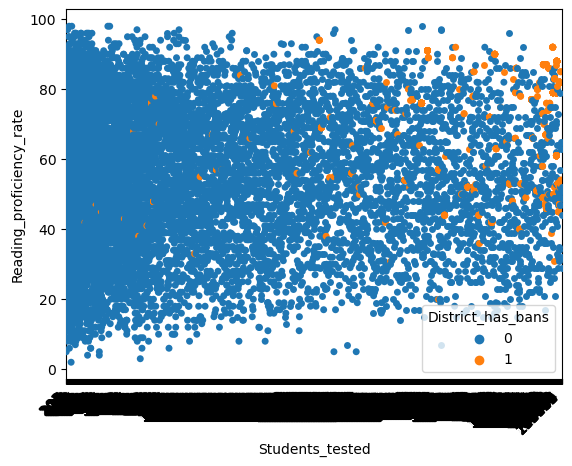

In [654]:
graph = sns.stripplot(data=total_num, x="Students_tested", y="Reading_proficiency_rate", hue="District_has_bans")
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')

## 8.1. Summary

Examining the intersection of reading proficiency data and information on book banning in public school districts has been fascinating.  The conclusions I was able to draw point to a slight positive correlation between reading proficiency and book banning and a slightly stronger positive correlation between number of students tested and book banning.  None of these suggest anything like cause or effect, and I suspect that instead these correlations are due to various and other factors outside this realm of research, such as parental involvement in school and economic privilege.  Nothing in this project can tell us about those kinds of possibilities.   
    
The model that worked best for this data of those that I examined was a support vector classification model.  This is a supervised machine learning algorithm that attempts to find the best boundaries to separate and classify data into different categories.  In this case, those categories were whether or not a school district had book bans.  The primary possibly explanatory factors I provided the model with for analysis were the number of students who had been tested for profiency (focused on reading in this case) and the average score for reading profiency for each school district.  I was able to create a reasonably well performing support vector classification model with this data.  With neither strongly relating to the dependent variable, however, the model only performed marginally better than an average level one might expect guessing outcome without much additional data.  This does not mean it was not useful at all, but it does indicate that we may not want to place a strong dependence on this model, at least not without adding a great deal more information to training and refining it.    
      
Conclusions and recommendations I could provide to school districts would largely depend on the goals and priorities of that school district.  However, I might suggest that larger school districts could potentially carry a higher likelihood of book bans.  While not all school districts might actively disagree with the ethical, social, and academic concerns of book banning, many may at least prefer to avoid the possible political stress that often comes with controversy over issues like book banning.  Therefore, while I cannot conclude that keeping school districts small can prevent book bans, I would encourage school districts who are hoping to prevent possible book bans to avoid actively attempting to increase the number of students in their district.  I would not feel ethically ok with encouraging school districts to decrease or prevent increase of reading proficiency in their district, so district size is the only conlusive advice I have to offer school districts without further research.

## 8.2. Future work

As I briefly mentioned above, I would like to understand more about about the possible connections between these topics and other factors that may be contributing to either or both.  While each is complex and likely affected by more factors than I can imagine or reasonably hope to discover and analyze all of, I do believe that there are likely to be a handful of common links and possibly causes that could be better understood.    
     
Were I to continue research in this area, I would focus next on the demographics of each school district, particularly looking into economic status, political affiliation, racial make-up, and religious identifications of each area.  If possible, I would also like to examine parental involvement in schools of each district.  While that is often closely related as well to other factors, such as economic status, the intersection of all of these seems to me to be incredibly useful to better understand.  Considering these and as many as possible other potentially relevant factors would help us paint a more complete picture of the aspects at play.  Doing so could allow us to more solidly advise school administrators, school board members, and other individuals and groups making choices for our schools and children and as such affecting all of the society around us.

## 8.3. Notes and concerns

To be honest, I am a bit disappointed in this work.  It felt overly simple and less useful than I had hoped.  I am processing whether that was because of my choice of topic or datasets or if I overly simplified the data as I cleaned it.  Perhaps there may have been more interesting insights, or at least more complex examination, had I kept some of the features/information that I eliminated as I worked to focus the research and pare down the vast amount of data to be more manageable.  Learning from the experience seems valuable regardless, but I hope to keep this in mind in future projects.   
      
Recognizing that I may have eliminated potentially useful data from my analysis also seems important to mention in considering how we interpret the conclusions and consider possible future work.  Without further examination of all the features, I cannot know whether there may be additional or even stronger lessons to be learned from these datasets.   
       
I also think it important to note that metrics such as standardized testing like those that determined reading proficiency in this dataset do not always demonstrate true academic performance, including that of reading proficiency.  These tests are often not inclusive of neuro-divergent and other groups that may not fit into such convenient numbers.  These metrics are also often skewed by external factors for students, families, schools, and communities, such as poverty, hunger, illness, and other variables.  When we use such simplified measurements to attempt to draw broader conclusions, I believe that it is our responsibility to keep such issues in mind.